In [1]:
import sympy
from sympy import *

from scipy.integrate import quad
import numpy as np
import matplotlib.pyplot as plt

### **Clase 6: Punto 3**

#### **Punto 3a**

In [2]:
x = Symbol('x')                 # Definimos a t como nuestra variable con la cual haremos las cuentas
[a ,b] = [-1, 1]                # Definimos el intervalo del espacio vectorial

n = abs(int(input("Ingrese el número de monios a corroborar: ")))
mon = []                        # Lista con la base compuesta por los monomios

# Llenamos la lista con los monomios solicitados:
for i in range(n):
    j = Matrix( [x**i] )
    mon.append(j)


# Definimos el producto interno:
def prodint1 (f, g):
    return integrate( f[0] * g[0] , (x, a, b) )

prodintmon = Matrix.zeros(n,n )

# Creamos una matriz de Gram para sintetizar la relación entre las bases propuestas:
for i in range(n):
    for j in range(n):
        prodintmon[ i , j ] = prodint1( mon[i] , mon[j] )
prodintmon

Matrix([
[  2,   0, 2/3,   0,  2/5,    0,  2/7],
[  0, 2/3,   0, 2/5,    0,  2/7,    0],
[2/3,   0, 2/5,   0,  2/7,    0,  2/9],
[  0, 2/5,   0, 2/7,    0,  2/9,    0],
[2/5,   0, 2/7,   0,  2/9,    0, 2/11],
[  0, 2/7,   0, 2/9,    0, 2/11,    0],
[2/7,   0, 2/9,   0, 2/11,    0, 2/13]])

Entonces, note como por el hecho de que las entradas distintas a la diagonal no sean 0, indica que existen bases que no son ortogonales entre sí

#### **Punto 3b**

In [3]:
# Ahora bien, orotogonalicemos la base dada por el punto anterior. Pero antes, note que el ejercicio nos solicita los primero 10 monomios. Por lo que:

mon10 = []

for i in range(10):
    j = Matrix( [x**i] )
    mon10.append(j)


pollegendre = []                    # La lista donde guardaremos a nuestros polinomios ortogonales (note que no son unitarios)

for v in mon10:
    u = v
    for o in pollegendre:
        u -= (prodint1 (o, v) / prodint1(o, o)) * o
    pollegendre.append(u)

FiniteSet(*pollegendre)

{Matrix([[1]]), Matrix([[x]]), Matrix([[x**2 - 1/3]]), Matrix([[x**3 - 3*x/5]]), Matrix([[x**4 - 6*x**2/7 + 3/35]]), Matrix([[x**5 - 10*x**3/9 + 5*x/21]]), Matrix([[x**6 - 15*x**4/11 + 5*x**2/11 - 5/231]]), Matrix([[x**7 - 21*x**5/13 + 105*x**3/143 - 35*x/429]]), Matrix([[x**8 - 28*x**6/15 + 14*x**4/13 - 28*x**2/143 + 7/1287]]), Matrix([[x**9 - 36*x**7/17 + 126*x**5/85 - 84*x**3/221 + 63*x/2431]])}

In [4]:
# Matriz de gram para verificarlo:
gramlegendre = Matrix.zeros( 10 , 10 )

for i in range(10):
    for j in range(10):
        gramlegendre[ i , j ] = prodint1( pollegendre[i] , pollegendre[j] )

gramlegendre

Matrix([
[2,   0,    0,     0,         0,         0,          0,           0,               0,                0],
[0, 2/3,    0,     0,         0,         0,          0,           0,               0,                0],
[0,   0, 8/45,     0,         0,         0,          0,           0,               0,                0],
[0,   0,    0, 8/175,         0,         0,          0,           0,               0,                0],
[0,   0,    0,     0, 128/11025,         0,          0,           0,               0,                0],
[0,   0,    0,     0,         0, 128/43659,          0,           0,               0,                0],
[0,   0,    0,     0,         0,         0, 512/693693,           0,               0,                0],
[0,   0,    0,     0,         0,         0,          0, 512/2760615,               0,                0],
[0,   0,    0,     0,         0,         0,          0,           0, 32768/703956825,                0],
[0,   0,    0,     0,         0,         0,   

#### **Punto 3c**

In [5]:
# Para este punto c, modificamos la definición de producto interno, tal que:
def prodint2 ( f, g ):
    fg = simplify( f * g * sqrt( 1 - x**2))
    h_func = lambdify( x, fg, 'mpmath' )  #Convertimos la función a un valor numérico para poder integrar con SciPy
    resultado, error = quad(h_func, a, b)
    return resultado

## Ahora, definimos a los monomios como funciones numéricas (para poder trabajar con SciPy

mon10chev = []
for i in range(10):
    j = x**i
    mon10chev.append(j)

# Para ortogonalizar la base, seguimos el mismo proceso del punto anterior: (tomaremos la misma lista mon10 con los primeros 10 monomios)


polchebyshev = []                    # La lista donde guardaremos a nuestros polinomios ortogonales

for v in mon10chev:
    u = v
    for o in polchebyshev:
        u -= (prodint2 (o, v) / prodint2(o, o)) * o
    polchebyshev.append(u)

print("Nuestra base ortogonal es: ")
FiniteSet(*polchebyshev)

Nuestra base ortogonal es: 


{1, x, x**2 - 0.24999999999994, x**3 - 0.500000000000115*x, x**4 - 0.750000000003326*x**2 + 0.0625000000007877, x**5 - 1.00000000002933*x**3 + 0.187500000014721*x, x**6 - 1.25000000013954*x**4 + 0.375000000106427*x**2 - 0.0156250000091397, x**7 - 1.49999999864765*x**5 + 0.624999998666387*x**3 - 0.0624999997557989*x, x**8 - 1.74999999296382*x**6 + 0.937499991304535*x**4 - 0.156249997436884*x**2 + 0.0039062498964469, x**9 - 2.00000002046181*x**7 + 1.3125000298092*x**5 - 0.312500011914002*x**3 + 0.0195312511176739*x}

#### **Punto 3d**

##### I: Expansión en la base de monomios y en la de Legendre

**Monomios:**

In [6]:
# Para poder expandir en la base de monomios, tenemos que plantear un sistema de ecuaciones:
h = sin(3*x) * (1 - x**2)
h_matrix = Matrix([ sin(3*x) * (1 - x**2) ])
h_aprox = lambdify(x, h, 'numpy')

m = abs(int(input("Ingrese el valor de la aproximación en monomios: ")))
mon = []
for i in range(n):
    j = Matrix([x**i])
    mon.append(j)

# Ahora bien, por facilidad, podemos plantear una función que devuelva los coeficientes de la expansión 
def f_aprox(f, base, n):
    # La matriz de Gram:
    G = Matrix.zeros(n, n)
    for i in range(n):
        for j in range(n):
            G[i, j] = prodint1(base[i], base[j])
    # El vector b:
    b = Matrix.zeros(n, 1)
    for i in range(n):
        b[i, 0] = prodint1(f, base[i])
    # Resolver el sistema
    C = G.LUsolve(b)
    f_aproximada = Matrix.zeros(1, 1)
    for j in range(n):
        f_aproximada += C[j] * base[j]
    return C, simplify(f_aproximada)

print("En el lado izquierdo obtendrá los coeficientes de C para la expanción por monomios, mientras que al lado derecho está el polinomio aproximación")
f_aprox (h_matrix, mon, m)


En el lado izquierdo obtendrá los coeficientes de C para la expanción por monomios, mientras que al lado derecho está el polinomio aproximación


(Matrix([
 [                              0],
 [  -820*sin(3)/81 - 95*cos(3)/27],
 [                              0],
 [385*cos(3)/81 + 3920*sin(3)/243],
 [                              0]]),
 Matrix([[5*x*(x**2*(231*cos(3) + 784*sin(3)) - 492*sin(3) - 171*cos(3))/243]]))

In [7]:
# Graficar la aproximación por monomios
C_monomios, f_aproximada_monomios = f_aprox(h_matrix, mon, m)
f_aproximada_monomios_num = lambdify(x, f_aproximada_monomios, 'numpy')

def h_eval_mon (x):
    return f_aproximada_monomios_num(x)


**Legendre:**

Los coeficientes de la aprox son:


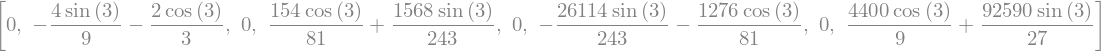

In [38]:
# Prueba:
h = Matrix( [ sin(3*x) * (1 - x**2) ] )

n = abs(int(input( "Ingrese el máximo grado de la aproximación que desea realizar: " )))

# Para este apartado, por convenenecia expanderemos en la base de Legendre usando la propia opción de sympy, dado que las normas son más manejables que as
# ortogonalizadas manualmente

legendre_base = [Matrix([legendre( m , x )]) for m in range(n) ]

# Ahora bien, vamos a calcular los coeficientes que así aproximan a nuestra función. Para ello, partimos del hecho de que los polinomios de Legendre son ortogonales
# por lo que para encontrar los coeficientes nos basta con hacer producto punto entre h y cada una de las bases.

def coefs(v):                                         # Para facilitar el gráfico más adelante, definiremos una función que nos devuelva una matriz con los coeficientes
  coef = []                                           # dependiendo del número de bases sobre las que se desee hacer la aproximación
  for i in range(v):
    ci = ( prodint1( h , legendre_base[i] ) / prodint1( legendre_base[i] , legendre_base [i] ) )
    coef.append(ci)
  return coef


print("Los coeficientes de la aprox son:")
init_printing()
coefs(n)

In [39]:
# Entonces, nuestra función aproximada es (en función de la cantidad de términos a aproximar):
def h_func_aprox(v):                    ### SIMBÓLICO
  h_aprox = Matrix.zeros(1, 1)
  local_coef = coefs(v)                 # Asignamos a la función de coeficientes una variable para que el bucle funcione correctamente
  for i in range(v):
      h_aprox = h_aprox + ( local_coef[i] * legendre_base[i] )
  return h_aprox


# Para poder graficar, convirtamos este valor en una función de tio numérico:

def h_lengendre_num (v):
  h_aprox_expr = h_func_aprox(v)  
  h_aprox_num = lambdify(x, h_aprox_expr, 'numpy')
  return h_aprox_num



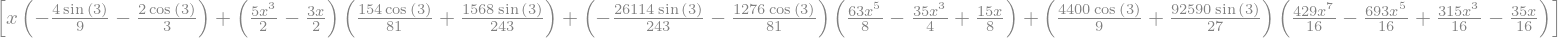

In [40]:
h_func_aprox(n)

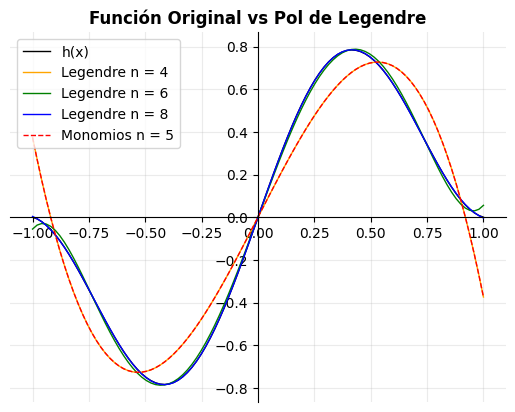

In [10]:
# Ahora, ya con nuestra función aproximada en modo numérico, podemos graficar

# Generamos una lista de números en el intervalo de -1 a 1
x_array = np.linspace(a, b, 100) 

fig = plt.figure()                                                  # Creación de la figurita

ax = fig.add_subplot(111)
ax.set_title('Función Original vs Pol de Legendre', fontweight='bold')                 # Título


# Ahora, definimos la función original de forma numérica ---------------------------------------------------------------
def h_num(x):
    return sin(3*x) * (1 - x**2)

h_vals = [h_num(val) for val in x_array]                            # Los valores en el eje y en func de la h original

# ----------------------------------------------------------------------------------------------------------------------
# GRÁFICO 

ax.plot(x_array, h_vals, label='h(x)', color="black", linewidth=1)

# Aprox de 2 términos
h_legendre_func4 = h_lengendre_num(4)
ax.plot(x_array, h_legendre_func4(x_array), label='Legendre n = 4', color="orange", linewidth=1, linestyle='-')

# Aprox de n términos
h_legendre_func6 = h_lengendre_num(6)
ax.plot(x_array, h_legendre_func6(x_array), label='Legendre n = 6', color="green", linewidth=1, linestyle='-')


# Aprox de n términos
h_legendre_func = h_lengendre_num(n)
ax.plot(x_array, h_legendre_func(x_array), label=f'Legendre n = {n}', color="blue", linewidth=1, linestyle='-')

# La expansión por monomios:
y_monomios = h_eval_mon(x_array)
ax.plot(x_array, np.array(y_monomios).flatten(), label=f'Monomios n = {m}', color='red', linewidth=1, linestyle='--')


ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
plt.grid(True, linestyle='-', alpha=0.25)
plt.legend()
plt.show()

##### II. Expansión en la base de Chebyshev

In [11]:
# De forma análoga al proceso con los polinomios de Legendre:
h_num = sin(3*x) * (1 - x**2)

chebyshev_base = [chebyshevu( m , x ) for m in range(n)]     # El chebyshevu es para generar a los polinomios de Chebyshev de segunda especie

# Como los polinomios de Chebyshev son una base ortogonal, es posible encontrar los coeficientes que así expanden por medio de proyecciones.

#Los coeficientes:

def coefs_cheb(v):                                         # Para facilitar el gráfico más adelante, definiremos una función que nos devuelva una lista con los coeficientes
  coef = []                                           # dependiendo del número de bases sobre las que se desee hacer la aproximación
  for i in range(v):
    ci = ( prodint2( h_num , chebyshev_base[i] ) / prodint2( chebyshev_base[i] , chebyshev_base [i] ) )
    coef.append(ci)
  return coef

# El polinomio aproximado
def pol_cheb_aprox(v):
  h_aprox_cheb = 0
  coeficientes = coefs_cheb(v)
  for i in range(v):
    h_aprox_cheb = h_aprox_cheb + (coeficientes[i] * chebyshev_base[i])
  return h_aprox_cheb

In [12]:
print("Los coeficientes numéricos que acompañan a los polinomios de Chebyshev son:")
init_printing()
coefs_cheb(5)

Los coeficientes numéricos que acompañan a los polinomios de Chebyshev son:


In [13]:
print("mientras que el polinomio aproximado es en sí: ")
init_printing()
pol_cheb_aprox(5)

mientras que el polinomio aproximado es en sí: 


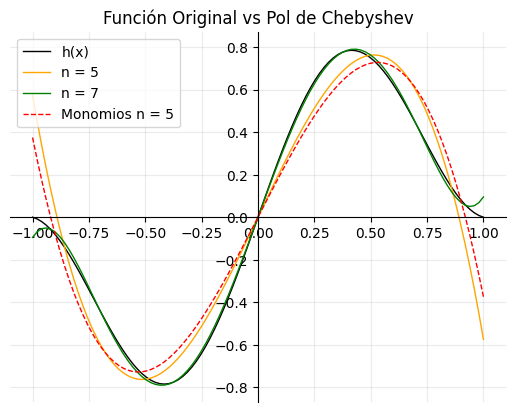

In [14]:
# GRÁFICA:
x_array = np.linspace(-1, 1, 100)

fig = plt.figure()                                                  # Creación de la figurita

ax = fig.add_subplot(111)
ax.set_title('Función Original vs Pol de Chebyshev')                 # Título

# ----------------------------------------------------------------------------------------------------------------------

# Gráfica de la función base
ax.plot(x_array, h_vals, label='h(x)', color="black", linewidth=1)

# ----------------------------------------------------------------------------------------------------------------------

# Gráfica de las aproximaciones:

    # Primero, tenemos que convertir a nuestra función a una de tipo numérico, para que nos permita evaluar en los distintos puntos de x_array y
    # así poder graficar:
def pol_cheb_aprox_num(n):
    pol = pol_cheb_aprox(n)
    return lambdify(x, pol, 'numpy')


# Ahora graficamos cada una de las distintas funciones aproximadas:


# n = 5:
h_cheb_5_func = pol_cheb_aprox_num(5)
ax.plot(x_array, h_cheb_5_func(x_array), label='n = 5', color="orange", linewidth=1, linestyle='-')

# n = 7:
h_cheb_7_func = pol_cheb_aprox_num(7)
ax.plot(x_array, h_cheb_7_func(x_array), label='n = 7', color="green", linewidth=1, linestyle='-')

# Monomio:
y_monomios = h_eval_mon(x_array)
ax.plot(x_array, np.array(y_monomios).flatten(), label=f'Monomios n = {m}', color='red', linewidth=1, linestyle='--')


ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
plt.grid(True, linestyle='-', alpha=0.25)
plt.legend()
plt.show()

##### III. Gráfico de expansiones por Chebyshev y Legendre

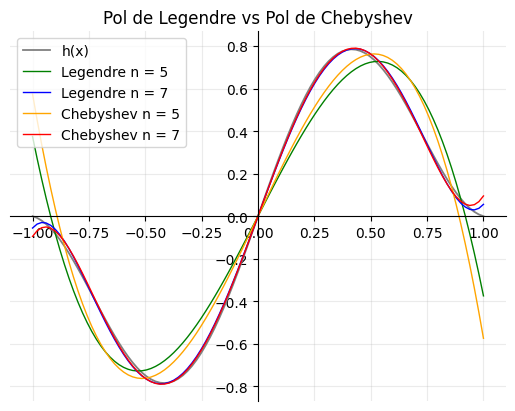

In [17]:
# GRÁFICA:
x_array = np.linspace(-1, 1, 100)

fig = plt.figure()                                                  # Creación de la figurita

ax = fig.add_subplot(111)
ax.set_title('Pol de Legendre vs Pol de Chebyshev')                 # Título

# ----------------------------------------------------------------------------------------------------------------------

# Gráfica de la función base
ax.plot(x_array, h_vals, label='h(x)', color="gray", linewidth=1.3)

# ----------------------------------------------------------------------------------------------------------------------

# LEGENDRE:

# Aprox de 5 términos
h_legendre_func4 = h_lengendre_num(5)
ax.plot(x_array, h_legendre_func4(x_array), label='Legendre n = 5', color="green", linewidth=1, linestyle='-')

# Aprox de 7 términos
h_legendre_func6 = h_lengendre_num(7)
ax.plot(x_array, h_legendre_func6(x_array), label='Legendre n = 7', color="blue", linewidth=1, linestyle='-')



# CHEBYSHEV:

# n = 5:
h_cheb_5_func = pol_cheb_aprox_num(5)
ax.plot(x_array, h_cheb_5_func(x_array), label='Chebyshev n = 5', color="orange", linewidth=1, linestyle='-')

# n = 7:
h_cheb_7_func = pol_cheb_aprox_num(7)
ax.plot(x_array, h_cheb_7_func(x_array), label='Chebyshev n = 7', color="red", linewidth=1, linestyle='-')


ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
plt.grid(True, linestyle='-', alpha=0.25)
plt.legend()
plt.show()

##### IV. Estimación del error

In [49]:
#  En primer lugar, note que el error puede ser entendido como el complemento ortogonal de la funció aproximada, que así expande a la función original
#  f. Entonces, para encontrar dicho error, una forma consiste en calcular la norma de dicho complemento, o lo que es lo mismo, el producto interno
#  del complemento ortogonal consigo mismo.

#--------------------------------------------------------------------------------------------------------------------------------------------------
# CASO MONOMIOS:

h = sin(3*x) * (1 - x**2)
h_matrix = Matrix([ sin(3*x) * (1 - x**2) ])

def error_mon (n): #una función que me estima el error para una expansión de n 
    dif = h_matrix - f_aproximada_monomios
    error = (prodint1 ( dif, dif ) )
    return sqrt(error)

# CASO POLINOMIOS DE LEGENDRE:

def prodint1(f, g):
    # Si f o g no son Matrix, conviértelos
    if not isinstance(f, Matrix):
        f = Matrix([f])
    if not isinstance(g, Matrix):
        g = Matrix([g])
    return integrate(f[0] * g[0], (x, a, b))


def error_legendre (n):
    h_aprox_leg = h_func_aprox(n)
    dif = h_matrix - h_aprox_leg
    error = (prodint1 ( dif, dif ) )
    return sqrt(error)

# CASO POLINOMIOS DE CHEBYSHEV: 

def error_cheb (n):
    dif = h - pol_cheb_aprox(n)
    error = (prodint2 ( dif, dif ) )
    return sqrt(error)

In [44]:
error_mon(4).evalf(10)

In [51]:
error_legendre(4).evalf()

In [ ]:
error_cheb(4)

In [53]:
error_legendre(8).evalf()

In [54]:
error_cheb(8)